In [5]:
import numpy as np
import gudhi
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    # "font.sans-serif": ["Helvetica"]
    })
gudhi.persistence_graphical_tools._gudhi_matplotlib_use_tex=True

In [18]:
print(gudhi.__debug_info__)

Pybind11 version 2.10.4 
Python version 3.10.11
Cython version 0.29.34 
Numpy version 1.21.6 
Eigen3 version 3.4.0
Boost version 1.81.0
CGAL header only version 5.5.2
GMP_LIBRARIES = /Users/runner/work/gudhi-devel/gudhi-devel/deps-uni/lib/libgmp.dylib
GMPXX_LIBRARIES = /Users/runner/work/gudhi-devel/gudhi-devel/deps-uni/lib/libgmpxx.dylib
MPFR_LIBRARIES = /Users/runner/work/gudhi-devel/gudhi-devel/deps-uni/lib/libmpfr.dylib



In [7]:
# Example connectivity matrix (replace with your own data)
# This should be a symmetric matrix with connectivity strengths

TEST_PATH = "/Users/h1de0us/uni/mer-eeg-analysis/data/deap_filtered/s01_plv.npy"

# read .npy file
connectivity_matrix = np.load(TEST_PATH)
connectivity_matrix.shape

(32, 32, 5)

In [8]:
# working only with gamma band
connectivity_matrix = connectivity_matrix[:, :, -1]
connectivity_matrix.shape

(32, 32)

In [9]:
distance_matrix = 1 - np.abs(connectivity_matrix)
distance_matrix

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.42196415, 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.66958137, 0.43528857, 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.71370683, 0.71746194, 0.72716256, ..., 1.        , 1.        ,
        1.        ],
       [0.65893838, 0.43962584, 0.39929292, ..., 0.72267486, 1.        ,
        1.        ],
       [0.62253995, 0.54531807, 0.56604293, ..., 0.74371374, 0.28350736,
        1.        ]])

In [10]:
rips_complex = gudhi.RipsComplex(distance_matrix=distance_matrix, max_edge_length=1.0)

simplex_tree = rips_complex.create_simplex_tree(max_dimension=1)
result_str = 'Rips complex is of dimension ' + repr(simplex_tree.dimension()) + ' - ' + \
    repr(simplex_tree.num_simplices()) + ' simplices - ' + \
    repr(simplex_tree.num_vertices()) + ' vertices.'
print(result_str)
# fmt = '%s -> %.2f'
# for filtered_value in simplex_tree.get_filtration():
#     print(fmt % tuple(filtered_value))

Rips complex is of dimension 1 - 528 simplices - 32 vertices.


In [11]:
filtration = simplex_tree.get_filtration()
filtration

In [12]:
persistence = simplex_tree.persistence()
persistence

[(0, (0.0, inf)),
 (0, (0.0, 0.6228932602142732)),
 (0, (0.0, 0.607808185368524)),
 (0, (0.0, 0.5413293548758782)),
 (0, (0.0, 0.5412904718863898)),
 (0, (0.0, 0.536347141536103)),
 (0, (0.0, 0.5318949685168508)),
 (0, (0.0, 0.519590323192606)),
 (0, (0.0, 0.5069580151622788)),
 (0, (0.0, 0.4993369467461467)),
 (0, (0.0, 0.49850061173838633)),
 (0, (0.0, 0.48001179038182695)),
 (0, (0.0, 0.4517546039485226)),
 (0, (0.0, 0.44639371065207567)),
 (0, (0.0, 0.43528856815933026)),
 (0, (0.0, 0.4219641509471058)),
 (0, (0.0, 0.4218812516846222)),
 (0, (0.0, 0.3998527264906613)),
 (0, (0.0, 0.39929291662525623)),
 (0, (0.0, 0.3828423377511785)),
 (0, (0.0, 0.37075503504570473)),
 (0, (0.0, 0.3665332472152706)),
 (0, (0.0, 0.3556473531523967)),
 (0, (0.0, 0.35406878140165454)),
 (0, (0.0, 0.35402955005400194)),
 (0, (0.0, 0.3372554888059387)),
 (0, (0.0, 0.3097647992862109)),
 (0, (0.0, 0.2835073632543228)),
 (0, (0.0, 0.22937175613310068)),
 (0, (0.0, 0.22742469374703744)),
 (0, (0.0, 0.21142

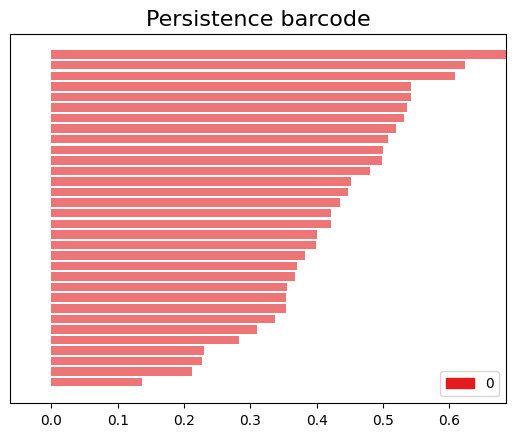

In [15]:
ax = gudhi.plot_persistence_barcode(persistence)

plt.show()

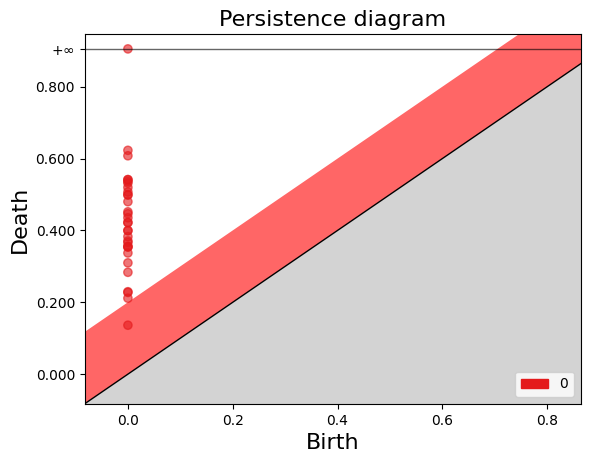

In [16]:
gudhi.plot_persistence_diagram(persistence, band=0.2)
plt.show()

Show barcode and diagram persistence side by side example


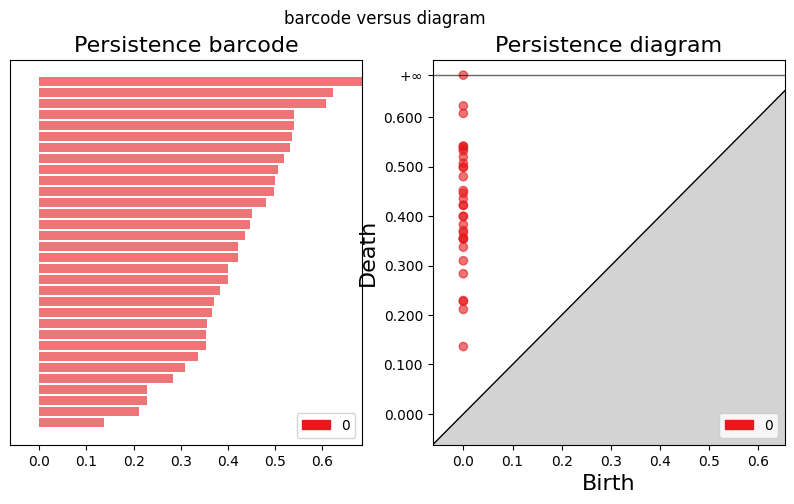

In [17]:
print("Show barcode and diagram persistence side by side example")
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
gudhi.plot_persistence_barcode(persistence, axes = axs[0])
gudhi.plot_persistence_diagram(persistence, axes = axs[1]) 
fig.suptitle("barcode versus diagram")
plt.show()

In [ ]:
# https://snyk.io/advisor/python/gudhi/functions/gudhi.plot_persistence_barcode